In [42]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

%matplotlib inline

In [43]:
loan = pd.read_csv('./loan_table.csv', parse_dates = ['date'])
loan.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0


In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null datetime64[ns]
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.9+ MB


In [45]:
borrower = pd.read_csv('./borrower_table.csv')
borrower.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [46]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [47]:
data = pd.merge(left = loan, right = borrower, on = 'loan_id')
data.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2012-02-09,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [48]:
data = data[data['loan_granted']==1]
data.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,2012-06-27,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,2012-05-21,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,2012-03-14,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,2012-08-31,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,2012-05-25,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 16 columns):
loan_id                                            47654 non-null int64
loan_purpose                                       47654 non-null object
date                                               47654 non-null datetime64[ns]
loan_granted                                       47654 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      47654 non-null int64
fully_repaid_previous_loans                        21865 non-null float64
currently_repaying_other_loans                     21865 non-null float64
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    46751 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_emplo

In [50]:
missing = data.isnull().sum()
missing[missing >0]

fully_repaid_previous_loans                        25789
currently_repaying_other_loans                     25789
avg_percentage_credit_card_limit_used_last_year      903
dtype: int64

In [51]:
data['month'] = data['date'].apply(lambda x: x.month)
data['week'] = data['date'].apply(lambda x: x.week)
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

data = data.drop(labels=['loan_id','date','loan_granted'],axis = 1, inplace = False)

In [52]:
print(data[data['is_first_loan']==1]['fully_repaid_previous_loans'].unique())
print(data[data['is_first_loan']==1]['currently_repaying_other_loans'].unique())

[nan]
[nan]


In [53]:
median = data['avg_percentage_credit_card_limit_used_last_year'].median()
data = data.fillna({'avg_percentage_credit_card_limit_used_last_year':median})

In [54]:
data = data.drop(labels=['month','week','dayofweek'], axis = 1, inplace = False)
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


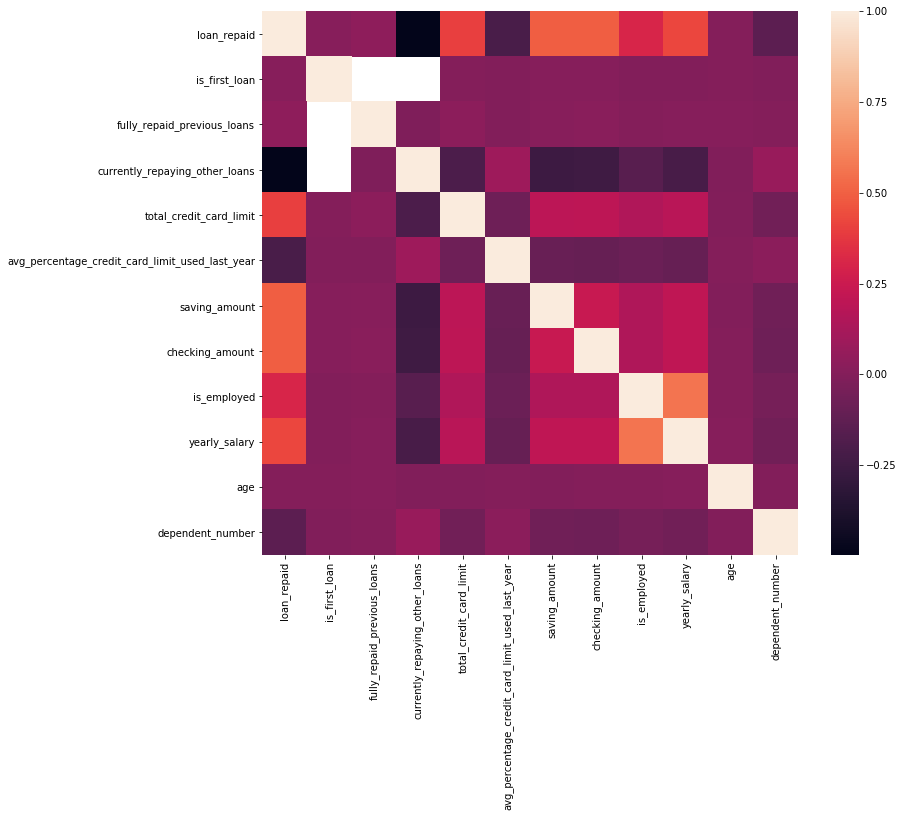

In [55]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),ax=ax)
plt.show()

In [56]:
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [57]:
encoder = LabelEncoder()
data['loan_purpose'] = encoder.fit_transform(data['loan_purpose'])
data.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,4,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,0,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,0,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,3,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [58]:
categorical_feature = ['loan_purpose', 'is_first_loan', 'fully_repaid_previous_loans', 
                       'currently_repaying_other_loans', 'is_employed']
target = 'loan_repaid'
data[categorical_feature] = data[categorical_feature].astype('category')
data[target] = data[target].astype('category')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null category
loan_repaid                                        47654 non-null category
is_first_loan                                      47654 non-null category
fully_repaid_previous_loans                        21865 non-null category
currently_repaying_other_loans                     21865 non-null category
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    47654 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null category
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
depend

In [60]:
# splite into training and test data set
X = data.drop('loan_repaid', axis = 1)
y = data['loan_repaid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify=y,random_state = 42 )

In [ ]:
d_train = llgb.Dataset(data)